In [1]:
import numpy as np
import matplotlib.pyplot as plt
from groupy import * 

(-0.534052617872214,
 2.5331227992331535,
 -0.5350176588031763,
 2.5419403819523803)

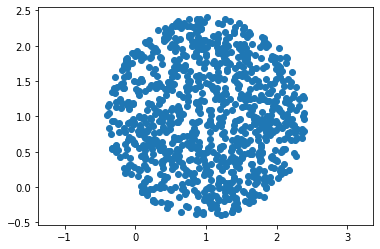

In [2]:
N = 1000
p = 2
X = generate_points_within_ball(N, p, np.sqrt(2)+.001, np.array([1,1]))
plt.scatter(X[0,:], X[1,:])
plt.axis('equal')

In [38]:
def check_SDP_alignment(X):
    TOL = 1e-6
    G = X.T@X
    A = np.diag(np.sum(G,axis=1)) - G
    # slower than Cholesky but doesnt complain when eigenvals are close to 0 
    evals, evecs = np.linalg.eig(A)
    print(A)
    e = np.min(evals)
    if e < -TOL:
        return False, e 
    return True, e

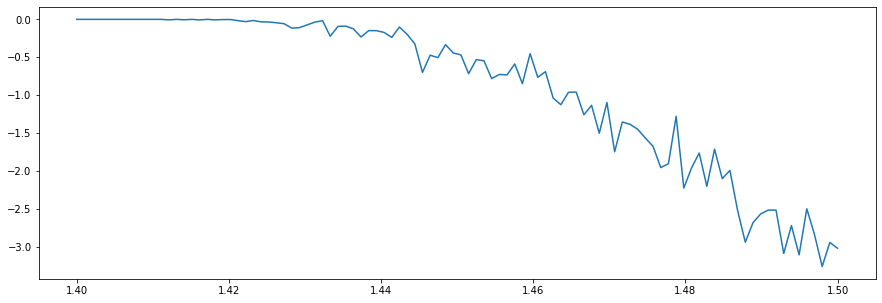

In [9]:
nvals = 100
ntrials = 100

N = 100
p = 2
evals = []
R = np.linspace(1.4,1.5,nvals)

for r in R:
    tempE = []
    for i in range(ntrials):
        X = generate_points_within_ball(N, p, r, np.array([1,1]))
        s, e = check_SDP_alignment(X)
        tempE.append(e)
    evals.append(np.mean(tempE))
    
fig = plt.figure(figsize = (15,5))
plt.plot(R, evals)

[[-1  0  1]
 [ 0  1 -1]
 [ 1 -1  0]]
(False, -1.7320508075688767)


(-1.1, 1.1, -0.05, 1.05)

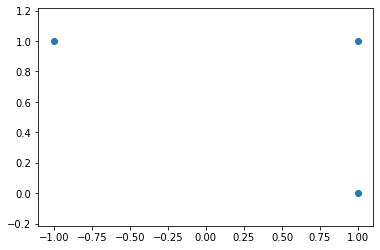

In [39]:
Y = np.array([[-1,1,1],[1,1,0]])
print(check_SDP_alignment(Y))
plt.scatter(Y[0,:], Y[1,:])
plt.axis('equal')

[[ 0.39714781  0.71340051  0.57735027]
 [ 0.41924906 -0.70064035  0.57735027]
 [-0.81639687 -0.01276016  0.57735027]] [-6.05197877e+00  2.02561722e+00  1.37555637e-16]
(False, -6.05197877461253)


(-1.100686654819839,
 1.1144197512166216,
 -1.1086113742301424,
 1.2808388588329906)

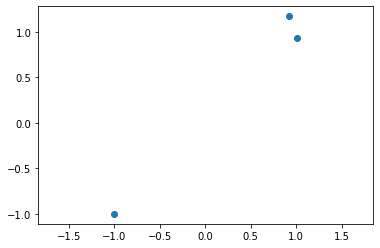

In [7]:
X = generate_points_within_ball(2, p, .3, np.array([1,1]))
Xbad = generate_points_within_ball(1, p, 0, np.array([-1, -1]))
Y = np.hstack([X, Xbad])
print(check_SDP_alignment(Y))
plt.scatter(Y[0,:], Y[1,:])
plt.axis('equal')

In [419]:
G = Y.T@Y
A = np.diag(np.sum(G,axis=1)) - G

e_k = np.array([0,0,1])
np.dot(e_k, A@e_k)

-4.055553118633346